In [18]:
import pandas as pd
path = "C:\\pytest\\충북 관광 데이터\\"
import rhinoMorph
file = path + "충주호.xlsx"
pd.set_option('mode.chained_assignment',  None)

In [19]:
data = pd.read_excel(file)
data = data.set_index('id')
data.head(2)

,글제목,글쓴이,내용,태그,공감수,댓글수
id,,,,,,
1,[산에들에방문기] 충주 리쿼리움 술박물관,산에들에,네이버블로거 맥플라이님의 언지로 리쿼리움술박물관에 대해서 알게 됐고마침 시간도 비어...,,NaN,1.0
2,2015년 을미년 한 해를 되돌아 보자~,준이윤이 아빠,2015년 을미년 바쁘게 돌아가는 세상뉴스에는 희망찬 뉴스보다보고 있으면 스트레스 ...,,6.0,5.0


In [20]:
# 결측치를 공백처리
data = data.fillna("")

In [21]:
# 추후에 분리를 가정해서 분리기호 *&%$^# 로 정해 합친다.
split_char = """ *&%$^# """
data['제목+내용+태그'] = data['글제목'] + split_char + data['내용'] + split_char + data['태그']

In [22]:
data_combine_user = data[['글쓴이', '제목+내용+태그', '공감수', '댓글수']]
data_combine_user

,글쓴이,제목+내용+태그,공감수,댓글수
id,,,,
1,산에들에,[산에들에방문기] 충주 리쿼리움 술박물관 *&%$^# 네이버블로거 맥플라이님의 언지...,,1.0
2,준이윤이 아빠,2015년 을미년 한 해를 되돌아 보자~ *&%$^# 2015년 을미년 바쁘게 돌아...,6.0,5.0
3,산 바람,90년대 충주호의 가을 *&%$^# *&%$^#,0.0,0.0
4,담보대출상담사,"드라이브코스 계획할 때, 이것만 알고 가면 된다! *&%$^# 드라이브하기 좋은 코...",0.0,0.0
5,몬개,청량산 해돋이[올림푸스 E-M1 + 40-150 PRO] *&%$^# 2016 원숭...,17.0,
...,...,...,...,...
5602,소련,"제천여행/ 클럽ES 충주호리조트, 두꺼비식당, 순수해카페, 의림지, 꿀참나무 *&%...",25.0,3.0
5603,덕덕,"[혼자 떠난 충주 여행] 뚜벅뚜벅, 당일치기 충주나들이 *&%$^# ﻿﻿ ﻿안녕하세...",26.0,47.0
5604,촛불,"충북 가볼만한곳 <충주편> 겨울철, 가족여행 6코스★ *&%$^# 충북 가볼만한곳 ...",10.0,


In [23]:
# data_combine_user.groupby(['글쓴이'])
data_combine_user['중복'] = data_combine_user['글쓴이'].duplicated(keep=False)
data_combine_user[data_combine_user.중복==True].sort_values(by='글쓴이')

,글쓴이,제목+내용+태그,공감수,댓글수,중복
id,,,,,
5203,010 3137 0241,충주 호암지구 토지분양 점포겸용 이주자 대책 용지 첫 번째 이야기 *&%$^# 환절...,7.0,2.0,True
5022,010 3137 0241,충주호 여행이야기 *&%$^# 활기찬 월요일입니다잇님들 행복한 주말되셨는지요^~시국...,8.0,0.0,True
4325,02,[베트남 여행/하롱베이]어센틱 하노이 호텔 + 하롱베이 크루즈 투어 + 천궁동굴 *...,1.0,0.0,True
5312,02,학현슈퍼 닭도리탕/ 신이 내린 닭도리탕 2009.11.4 *&%$^# 학현 슈퍼 ...,17.0,11.0,True
1299,Ah,"[충청도 1박2일가족여행_1일차]청풍리조트, 도담삼봉, 사인암, 충주호유람선 *&%...",3.0,1.0,True
...,...,...,...,...,...
5218,히랑,청풍문화재 단지 *&%$^# 평화롭던 수많은 마을이 호수 물속에 잠겼다. 사람들은...,,3.0,True
650,히말라야비타다이제,아베오 몸풀기에 제격인 드라이브 코스!! *&%$^# 아베오하면 떠오르는 말이 있습...,,0.0,True
1202,히말라야비타다이제,"설레는 벚꽃길 드라이브 코스 5곳! *&%$^# 지금 이 글을 보시는 여러분들, 몸...",,0.0,True


In [7]:
# 글의 길이, 글의 빈도수, 키워드
path

'C:\\pytest\\충북 관광 데이터\\'

In [8]:
with open(path+"ban_list.txt", encoding='utf-8') as f:
    ban_list1 = f.read()
ban_list2 = pd.read_excel(path+"벤.xlsx")

In [9]:
ban_list1 = ban_list1.split('\n')
ban_list3 = ban_list1[83:]
ban_list1 = ban_list1[:83]

In [10]:
ban_list3=' '.join(ban_list3).split('#')
ban_list3 = [i.strip() for i in ban_list3 if len(i.strip())!=0]

In [11]:
result_list = ban_list1 + ban_list3 + list(ban_list2.loc[:,:]) +list(ban_list2.부동산)

In [12]:
ban_최종 = list(set(result_list))

In [13]:
len(list(set(result_list)))

465

In [14]:
# pd.DataFrame(ban_최종).to_csv(path+ 'ban_final.csv', encoding='cp949')

In [15]:
ban_최종

['비전동정형외과',
 '후순위아파트담보대출',
 '저신용자중고차할부',
 '호텔어플',
 '충주분위기좋은카페',
 '스타캐슬',
 '삼촌',
 '기업',
 '소노펠리체계약금',
 '할리용인점',
 '원주입주청소',
 '김포한강아이파크',
 '충주시토지(전)경매',
 '할리안태희',
 '대마도여행',
 '관광통역안내사실무교육',
 '페나테스풀빌라',
 '금호동재테크',
 '중고차할부구입',
 '폴인러브',
 '악취차단100',
 '충주호',
 '사우아이파크',
 '하수구고압세척',
 'hayaansw',
 '무도특채',
 '영원무역',
 '안성공도핫요가',
 '미니하우스*',
 '세이투어',
 '미술·디자인',
 '대학생아카데미2박3일캠프',
 '충주지웰청소업체',
 '합천호',
 '변종근',
 '수안보온천',
 '도전',
 '어린이보험',
 '안양꾼낚시',
 '민주평통상임위원',
 '변기막힘',
 '겨울황소',
 '충주목행동신규아파트',
 '임차인',
 '제부도여행',
 '대통령직속통일준비위원회',
 '신차장기렌트카',
 '헤어디자이너되는방법',
 '충주에코폴리스사업개요',
 '후순위빌라담보대출',
 '해리사랑',
 '숙박어플',
 '청풍호지기',
 '국제축구연맹(FIFA)',
 '건물붕괴사고',
 '충주부동산아파트까치부동산',
 '충청일보',
 '정소장',
 '평택가죽공방',
 '저신용자장기렌트카',
 '공도요가원',
 '인공산란장지원사업',
 '제부도조',
 '대학생리더십아카데미',
 '대학생대외활동',
 '분당철학원',
 '공병호 훌륭한 인생',
 '유아로션',
 '정품토너매입',
 '참사',
 '김포한강아이파크분양가',
 '박 프로',
 '그림여행',
 '충주민들레',
 '아역배우',
 '대외활동',
 '공병호',
 '워크샵',
 '화성인',
 '아파트추가대출',
 '사고대차',
 '하롱베이',
 '담보대출상담사',
 '김포아이파크',
 '관광통역안내사학원',
 '전원주택사진',
 '인터뷰',
 '스윙댄스',
 '공원환경조형물',
 '충주에코폴리스',

In [16]:
pd.read_csv(r"C:\pytest\감성사전_조별과제\조별작업_감정사전\5조_김병주_이재혁_이한별_이호진\pos_final.csv").to_csv(r"C:\pytest\감성사전_조별과제\조별작업_감정사전\5조_김병주_이재혁_이한별_이호진\pos_final.csv", encoding='cp949')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 1: invalid start byte

In [ ]:
pd.read_csv(r"C:\pytest\감성사전_조별과제\조별작업_감정사전\5조_김병주_이재혁_이한별_이호진\neg_final.csv", encoding='ANSI').to_csv(r"C:\pytest\감성사전_조별과제\조별작업_감정사전\5조_김병주_이재혁_이한별_이호진\neg_final.csv", encoding='cp949')

In [17]:
# data_combine_user.groupby(['글쓴이'])
data_combine_user['중복'] = data_combine_user['글쓴이'].duplicated(keep=False)
data_combine_user[data_combine_user.중복==True].sort_values(by='글쓴이')

,글쓴이,제목+내용+태그,공감수,댓글수,중복
id,,,,,
5203,010 3137 0241,충주 호암지구 토지분양 점포겸용 이주자 대책 용지 첫 번째 이야기 *&%$^# 환절...,7.0,2.0,True
5022,010 3137 0241,충주호 여행이야기 *&%$^# 활기찬 월요일입니다잇님들 행복한 주말되셨는지요^~시국...,8.0,0.0,True
4325,02,[베트남 여행/하롱베이]어센틱 하노이 호텔 + 하롱베이 크루즈 투어 + 천궁동굴 *...,1.0,0.0,True
5312,02,학현슈퍼 닭도리탕/ 신이 내린 닭도리탕 2009.11.4 *&%$^# 학현 슈퍼 ...,17.0,11.0,True
1299,Ah,"[충청도 1박2일가족여행_1일차]청풍리조트, 도담삼봉, 사인암, 충주호유람선 *&%...",3.0,1.0,True
...,...,...,...,...,...
5218,히랑,청풍문화재 단지 *&%$^# 평화롭던 수많은 마을이 호수 물속에 잠겼다. 사람들은...,,3.0,True
650,히말라야비타다이제,아베오 몸풀기에 제격인 드라이브 코스!! *&%$^# 아베오하면 떠오르는 말이 있습...,,0.0,True
1202,히말라야비타다이제,"설레는 벚꽃길 드라이브 코스 5곳! *&%$^# 지금 이 글을 보시는 여러분들, 몸...",,0.0,True


In [18]:
data_combine_user['글쓴횟수']=0

In [19]:
# data_combine_user.groupby(['글쓴이'])
data_combine_user['중복'] = data_combine_user['글쓴이'].duplicated(keep=False)
dup_writer_list =  set(data_combine_user[data_combine_user.중복==True].sort_values(by='글쓴이').글쓴이)
dup_id_list =  set(data_combine_user[data_combine_user.중복==True].sort_values(by='글쓴이').id)

AttributeError: 'DataFrame' object has no attribute 'id'

In [20]:
for writer in dup_writer_list:
    id = 6000
    글쓴이 = writer
    내용 = ""
    공감수 = 0
    댓글수 = 0
    글쓴횟수 = 0
    temp_df = data_combine_user[data_combine_user.글쓴이==글쓴이]
    for i in temp_df['제목+내용+태그']:
        내용 += i
        글쓴횟수 += 1
    for i in temp_df['공감수']:
        공감수 += i
    for i in temp_df['댓글수']:
        댓글수 += i
    for i in temp_df.index:
        data_combine_user.drop(index=i, inplace=True)
    temp = pd.DataFrame({'id':id,'글쓴이':글쓴이,'제목+내용+태그':내용,'공감수':공감수,'댓글수':댓글수,'글쓴횟수':글쓴횟수})
    id+=1
temp



ValueError: If using all scalar values, you must pass an index

In [206]:
data = pd.read_csv(path+"unique_writer.csv", encoding='utf-8')
data

,글쓴이,제목+내용+태그,공감수,댓글수,중복수
0,0 min,단양 *&%$^# 2016.12.17 - 2016.12.18단양으로 여행을 다녀왔다...,13.0,12.0,1.0
1,010 3366 0002,국내 드라이브 코스 명소 완전 정복. *&%$^# 국내 드라이브 코스 명소 완전 정...,2.0,0.0,1.0
2,11lala,"2박3일 영주,단양 수학여행 계획표 *&%$^# <첫째날> 5/23 (월)\n 시간...",0.0,1.0,1.0
3,1205호,#160625 충주 원조중앙탑막국수 *&%$^# 예전 친정 아빠한테 추천받았던 중앙...,0.0,0.0,1.0
4,1980복부인,충북 제천시 청풍문화재단지에 답사 다녀왔어요 *&%$^# 안녕하세요~ 1980복부인...,11.0,16.0,1.0
...,...,...,...,...,...
3746,흙집지기,"{단양여행코스} 단양야경 좋은곳 ""고수대교"" *&%$^# {단양여행코스} 단양야경 ...",37.0,22.0,3.0
3747,희망을 위하여,소풍모드) 충주호 주변 노지. *&%$^# 오리가 노닐고..전투기 날아 다니는..;...,114.0,46.0,3.0
3748,히랑,(2016 올해의 관광도시 제천)청풍명월을 발 아래에 두련다.청풍호 모노레일 *&%...,0.0,7.0,2.0
3749,히말라야비타다이제,아베오 몸풀기에 제격인 드라이브 코스!! *&%$^# 아베오하면 떠오르는 말이 있습...,0.0,0.0,2.0


In [207]:
ban_word = list(pd.read_csv(path+"ban_final_edit.csv", encoding='cp949')['ban_list'])

In [208]:
def ban(df):
    for word in ban_word:
        if word in df:
            return 1
    return 0


In [209]:
data['분류'] = 0 # 정상0홍보1제거대상9
data.분류 = data['제목+내용+태그'].apply(ban)

In [210]:
data

,글쓴이,제목+내용+태그,공감수,댓글수,중복수,분류
0,0 min,단양 *&%$^# 2016.12.17 - 2016.12.18단양으로 여행을 다녀왔다...,13.0,12.0,1.0,0
1,010 3366 0002,국내 드라이브 코스 명소 완전 정복. *&%$^# 국내 드라이브 코스 명소 완전 정...,2.0,0.0,1.0,1
2,11lala,"2박3일 영주,단양 수학여행 계획표 *&%$^# <첫째날> 5/23 (월)\n 시간...",0.0,1.0,1.0,1
3,1205호,#160625 충주 원조중앙탑막국수 *&%$^# 예전 친정 아빠한테 추천받았던 중앙...,0.0,0.0,1.0,0
4,1980복부인,충북 제천시 청풍문화재단지에 답사 다녀왔어요 *&%$^# 안녕하세요~ 1980복부인...,11.0,16.0,1.0,1
...,...,...,...,...,...,...
3746,흙집지기,"{단양여행코스} 단양야경 좋은곳 ""고수대교"" *&%$^# {단양여행코스} 단양야경 ...",37.0,22.0,3.0,0
3747,희망을 위하여,소풍모드) 충주호 주변 노지. *&%$^# 오리가 노닐고..전투기 날아 다니는..;...,114.0,46.0,3.0,1
3748,히랑,(2016 올해의 관광도시 제천)청풍명월을 발 아래에 두련다.청풍호 모노레일 *&%...,0.0,7.0,2.0,1
3749,히말라야비타다이제,아베오 몸풀기에 제격인 드라이브 코스!! *&%$^# 아베오하면 떠오르는 말이 있습...,0.0,0.0,2.0,0


In [211]:
data[data['분류']==1]

,글쓴이,제목+내용+태그,공감수,댓글수,중복수,분류
1,010 3366 0002,국내 드라이브 코스 명소 완전 정복. *&%$^# 국내 드라이브 코스 명소 완전 정...,2.0,0.0,1.0,1
2,11lala,"2박3일 영주,단양 수학여행 계획표 *&%$^# <첫째날> 5/23 (월)\n 시간...",0.0,1.0,1.0,1
4,1980복부인,충북 제천시 청풍문화재단지에 답사 다녀왔어요 *&%$^# 안녕하세요~ 1980복부인...,11.0,16.0,1.0,1
5,2002all,제천 월악산 영봉(20160709) *&%$^# 등산을 다녀온 지 하루가 지난 지금...,0.0,0.0,1.0,1
10,24seenet,"북바위산 *&%$^# 월악산 국립공원, 북바위산!""웰빙산악회대구"" (회장 청산 황진...",0.0,0.0,1.0,1
...,...,...,...,...,...,...
3737,화풍,수안보온천 관광특구 - 충북 충주여행 *&%$^# ​​수안보온천 관광특구는...,13.0,2.0,4.0,1
3740,황도바다 지킴이,황도바다지킴이 수석 개인전 *&%$^# 황도바다지킴이 수석 개인전 지난날 수석 탐...,248.0,73.0,2.0,1
3741,회원권 114,단양대명리조트 회원권매매 알아보세요~ *&%$^# 단양대명리조트 관광중심지로 놀러가...,3.0,14.0,2.0,1
3747,희망을 위하여,소풍모드) 충주호 주변 노지. *&%$^# 오리가 노닐고..전투기 날아 다니는..;...,114.0,46.0,3.0,1


In [212]:
submit_df = pd.read_excel(path +"충주호.xlsx")
submit_df = submit_df[['내용']]
submit_df = submit_df.fillna('')
submit_df['분류']=0
submit_df

,내용,분류
0,네이버블로거 맥플라이님의 언지로 리쿼리움술박물관에 대해서 알게 됐고마침 시간도 비어...,0
1,2015년 을미년 바쁘게 돌아가는 세상뉴스에는 희망찬 뉴스보다보고 있으면 스트레스 ...,0
2,,0
3,드라이브하기 좋은 코스 추천!!가을 억새의 정취를 제대로 느낄 수 있는 제주 지역의...,0
4,2016 원숭이 병신년을 맞이하여 이웃님들 가내 행복과 건강을 기원합니다새해 새벽6...,0
...,...,...
5601,ADIEU 2 0 1 6 행복하고 다사다난 했던 올해지만내년에는 좋은 소식만 있길반...,0
5602,﻿﻿ ﻿안녕하세요! 덕덕입니다 :)오늘은 크리스마스에 다녀온 따뜻했던 충주여행기를 ...,0
5603,"충북 가볼만한곳 <충주편> 겨울철, 가족여행 6코스★ \n\n\n\n\n\n\n...",0
5604,어렸을 적 충주 가까이에 살았습니다. 저희 가족은 나들이가는 걸 좋아해서 주말이면...,0


In [213]:
def ban(df): # 정상0홍보1제거대상9
    for word in ban_word+['유료터닷컴']:
        if word in df:
            return 1
    if len(df)==0:
        return 9
    제거대상 = ['지도보기', '광역상수도']
    for word in 제거대상:
        if word in df:
            return 9
    return 0

In [214]:
# 정상0홍보1제거대상9
submit_df.분류 = submit_df['내용'].apply(ban)

In [215]:
submit_df[:20]

,내용,분류
0,네이버블로거 맥플라이님의 언지로 리쿼리움술박물관에 대해서 알게 됐고마침 시간도 비어...,1
1,2015년 을미년 바쁘게 돌아가는 세상뉴스에는 희망찬 뉴스보다보고 있으면 스트레스 ...,1
2,,9
3,드라이브하기 좋은 코스 추천!!가을 억새의 정취를 제대로 느낄 수 있는 제주 지역의...,1
4,2016 원숭이 병신년을 맞이하여 이웃님들 가내 행복과 건강을 기원합니다새해 새벽6...,0
5,2015. 9. 12점심 먹고 예약한 수안보 가족탕으로~!!1주일 전에 패밀리 스파...,1
6,충주역 앞에 충주 관광 안내도가 설치되었네요.\n충주의 관광정보와 충주역 기차시간표...,1
7,새해에는 새벽4시 남산을 향하는데 이미주차장은 만원이여서 길가에도 주차할 공간은없어...,1
8,​\n2016 충주시 해맞이행사 성대히열려\n충주발전과 시민소망을 풍선에담아 하늘높...,0
9,안녕하세요~ 지난 크리스마스날에실내낚시터에 다녀왔는데용http://blog.nave...,1


In [34]:
# submit_df=submit_df.replace(to_replace="\xa0", value="")
submit_df.to_csv(path+"submit.csv", encoding='utf-8', index=False)

In [216]:
data

,글쓴이,제목+내용+태그,공감수,댓글수,중복수,분류
0,0 min,단양 *&%$^# 2016.12.17 - 2016.12.18단양으로 여행을 다녀왔다...,13.0,12.0,1.0,0
1,010 3366 0002,국내 드라이브 코스 명소 완전 정복. *&%$^# 국내 드라이브 코스 명소 완전 정...,2.0,0.0,1.0,1
2,11lala,"2박3일 영주,단양 수학여행 계획표 *&%$^# <첫째날> 5/23 (월)\n 시간...",0.0,1.0,1.0,1
3,1205호,#160625 충주 원조중앙탑막국수 *&%$^# 예전 친정 아빠한테 추천받았던 중앙...,0.0,0.0,1.0,0
4,1980복부인,충북 제천시 청풍문화재단지에 답사 다녀왔어요 *&%$^# 안녕하세요~ 1980복부인...,11.0,16.0,1.0,1
...,...,...,...,...,...,...
3746,흙집지기,"{단양여행코스} 단양야경 좋은곳 ""고수대교"" *&%$^# {단양여행코스} 단양야경 ...",37.0,22.0,3.0,0
3747,희망을 위하여,소풍모드) 충주호 주변 노지. *&%$^# 오리가 노닐고..전투기 날아 다니는..;...,114.0,46.0,3.0,1
3748,히랑,(2016 올해의 관광도시 제천)청풍명월을 발 아래에 두련다.청풍호 모노레일 *&%...,0.0,7.0,2.0,1
3749,히말라야비타다이제,아베오 몸풀기에 제격인 드라이브 코스!! *&%$^# 아베오하면 떠오르는 말이 있습...,0.0,0.0,2.0,0


In [217]:
data['제목+내용+태그'][2]

'2박3일 영주,단양 수학여행 계획표 *&%$^# <첫째날> 5/23 (월)\n\xa0시간장소\xa0특징\xa008:00\xa0양서중학교\xa0정시에 버스 출발. 지각 안 됨. 점심도시락 준비. 멀미약 준비.\xa0\xa011:00(단양숙소)한드미마을\xa0숙소 짐풀기. \xa0\xa012:00월악산 국립공원밥먹기. 산책.\xa002:00도담삼봉 ,사인암,충주호\xa0\xa0구경.\xa0\xa006:00식당\xa0밥먹기. 휴식\xa0\xa010:00~한드미마을\xa0씻기. 자유시간.(취침)\xa0\u200b\xa0\ufeff<둘째 날> 5/24 (화)\xa0\n\n\n시간\xa0장소\xa0특징\xa0\xa009:00\xa0숙소기상. 아침식사. 짐싸기\xa011:00\xa0(영주숙소)선비문화수련원짐풀기. 밥먹기\xa002:00부석사\xa0.소수서원구경\xa004:00선비문화수련원여러 체험관 체험07:00\xa0선비문화수련원 식당저녁식사. 휴식08:00선비문화수련원레크레이션 . 장기자랑\xa0\xa011:00선비문화수련원\xa0취침준비. 씻기. (취침)\ufeff<셋째 날> 5/25 (수)\n시간\xa0\xa0장소특징\xa008:00숙소\xa0기상. 씻기. 자유시간\xa009:00\xa0식당밥먹기. 짐싸기\xa011:00\xa0선비촌\xa0유교 문화 체험\xa012:00\xa0소수박물관 & 식당유교관련 유물 보기\xa0.밥먹기\xa002:00\xa0금성단\xa0구경02:30\xa0버스양서중학교로 출발\xa0\xa005:00\xa0양서중학교끝.\u200b *&%$^# '

In [87]:
import unicodedata
unicodedata.normalize("NFKD", data['제목+내용+태그'][2])

'2박3일 영주,단양 수학여행 계획표 *&%$^# <첫째날> 5/23 (월)\n 시간장소 특징 08:00 양서중학교 정시에 버스 출발. 지각 안 됨. 점심도시락 준비. 멀미약 준비.  11:00(단양숙소)한드미마을 숙소 짐풀기.   12:00월악산 국립공원밥먹기. 산책. 02:00도담삼봉 ,사인암,충주호  구경.  06:00식당 밥먹기. 휴식  10:00~한드미마을 씻기. 자유시간.(취침) \u200b \ufeff<둘째 날> 5/24 (화) \n\n\n시간 장소 특징  09:00 숙소기상. 아침식사. 짐싸기 11:00 (영주숙소)선비문화수련원짐풀기. 밥먹기 02:00부석사 .소수서원구경 04:00선비문화수련원여러 체험관 체험07:00 선비문화수련원 식당저녁식사. 휴식08:00선비문화수련원레크레이션 . 장기자랑  11:00선비문화수련원 취침준비. 씻기. (취침)\ufeff<셋째 날> 5/25 (수)\n시간  장소특징 08:00숙소 기상. 씻기. 자유시간 09:00 식당밥먹기. 짐싸기 11:00 선비촌 유교 문화 체험 12:00 소수박물관 & 식당유교관련 유물 보기 .밥먹기 02:00 금성단 구경02:30 

In [219]:
# import unicodedata
# def refine(text):
#     return unicodedata.normalize("NFKD", text)
# data['정제'] = data['제목+내용+태그'].apply(refine)
# data
# data.drop('정제',axis=1,inplace=True)

In [220]:
중요단어 = ['충주호', '청풍호']
import unicodedata

def extract(text):
    text_list = text.split('.')
    text_list = [i+'.' for i in text_list]
    result = []
    for idx, sentence in enumerate(text_list):
        for word in 중요단어:
            if word in sentence:
                result.append(text_list[idx].replace('\n',"").replace('\t',"").strip())
                try:
                    result.append(text_list[idx+1].replace('\n',"").replace('\t',"").strip())
                except:
                    pass
                try:
                    result.append(text_list[idx+2].replace('\n',"").replace('\t',"").strip())
                except:
                    pass
    return ' '.join(result)
    # return unicodedata.normalize("NFKD", ' '.join(result))
data['핵심문장'] = data['제목+내용+태그'].apply(extract)
data

,글쓴이,제목+내용+태그,공감수,댓글수,중복수,분류,핵심문장
0,0 min,단양 *&%$^# 2016.12.17 - 2016.12.18단양으로 여행을 다녀왔다...,13.0,12.0,1.0,0,충주호 관광 유람선이 또한 아주 아주 강력하게 추천한다유람선 하는 업체도 몇 개 있...
1,010 3366 0002,국내 드라이브 코스 명소 완전 정복. *&%$^# 국내 드라이브 코스 명소 완전 정...,2.0,0.0,1.0,1,호수와 산의 아름다운 경관을 느낄 수 있는 충주호에서는 아찔하게 깎인 절벽 밑으로 ...
2,11lala,"2박3일 영주,단양 수학여행 계획표 *&%$^# <첫째날> 5/23 (월)\n 시간...",0.0,1.0,1.0,1,"02:00도담삼봉 ,사인암,충주호 구경. 06:00식당 밥먹기. 휴식 10:00..."
3,1205호,#160625 충주 원조중앙탑막국수 *&%$^# 예전 친정 아빠한테 추천받았던 중앙...,0.0,0.0,1.0,0,#160625 충주 원조중앙탑막국수 *&%$^# 예전 친정 아빠한테 추천받았던 중앙...
4,1980복부인,충북 제천시 청풍문화재단지에 답사 다녀왔어요 *&%$^# 안녕하세요~ 1980복부인...,11.0,16.0,1.0,1,"​ 한벽루에서 충주호가 한눈에 보이며 주변에 비봉산, 구담봉, 옥순봉, 능각구곡, ..."
...,...,...,...,...,...,...,...
3746,흙집지기,"{단양여행코스} 단양야경 좋은곳 ""고수대교"" *&%$^# {단양여행코스} 단양야경 ...",37.0,22.0,3.0,0,"984853""}'&gt;지도보기&lt;/a&gt;구경시장에는 마늘닭강정, 마늘순대,..."
3747,희망을 위하여,소풍모드) 충주호 주변 노지. *&%$^# 오리가 노닐고..전투기 날아 다니는..;...,114.0,46.0,3.0,1,소풍모드) 충주호 주변 노지. *&%$^# 오리가 노닐고. . 벚꽃엔딩~♡제천 청풍...
3748,히랑,(2016 올해의 관광도시 제천)청풍명월을 발 아래에 두련다.청풍호 모노레일 *&%...,0.0,7.0,2.0,1,청풍호 모노레일 *&%$^# 청풍명월을 발 아래에 두련다. 청풍호 모노레일 물...
3749,히말라야비타다이제,아베오 몸풀기에 제격인 드라이브 코스!! *&%$^# 아베오하면 떠오르는 말이 있습...,0.0,0.0,2.0,0,사진 속 호수는 바로 충주호인데요. 아베오의 재미있는 드라이빙 성능을 느낄 수 있고...


In [221]:
data['pos']=None
data['pos_word']=None
data['neg']=None
data['neg_word']=None
data['senti_score']=None
data['sigmoid']=None
data['predict']=None

import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [224]:
import pandas as pd
path = "C:\\projects\\pytest\\충북 관광 데이터\\"
positive = pd.read_csv(path+"긍정.csv", encoding='cp949')
negative = pd.read_csv(path+"부정.csv", encoding='cp949')
pos = list(positive.긍정키워드)
neg = list(negative.부정키워드)

remove_pos_list = ['합격']
remove_neg_list = []
for i in remove_pos_list:
    pos.remove(i)
for i in remove_neg_list:
    neg.remove(i)
# pos = pos+['좋은', '장관입니다', '경관']

In [225]:
def keyword_pos(text):
    result = 0
    morphed_data_each, _ = rhinoMorph.wholeResult_list(rn, text, pos=['NNG', 'NNP', 'VA', 'XR'], eomi=True, xrVv=True, combineN=True)
    for word in morphed_data_each:
        if word in pos:
            result += 1
    return result

def keyword_pos_word(text):
    result = []
    morphed_data_each, _ = rhinoMorph.wholeResult_list(rn, text, pos=['NNG', 'NNP', 'VA', 'XR'], eomi=True, xrVv=True, combineN=True)
    for word in morphed_data_each:
        if word in pos:
            result.append(word)
    return result

def keyword_neg(text):
    result = 0
    morphed_data_each, _ = rhinoMorph.wholeResult_list(rn, text, pos=['NNG', 'NNP', 'VA', 'XR'], eomi=True, xrVv=True, combineN=True)
    for word in morphed_data_each:
        if word in neg:
            result += 1
    return result

def keyword_neg_word(text):
    result = []
    morphed_data_each, _ = rhinoMorph.wholeResult_list(rn, text, pos=['NNG', 'NNP', 'VA', 'XR'], eomi=True, xrVv=True, combineN=True)
    for word in morphed_data_each:
        if word in neg:
            result.append(word)
    return result

import math
def sigmoid(num):
    return 1/(1+math.exp(-num))

def predict(num):
    result = '긍정'
    if num<0.5:
        result = '부정'
    return result

In [226]:
data.pos = data.핵심문장.apply(keyword_pos)
data.pos_word = data.핵심문장.apply(keyword_pos_word)
data.neg = data.핵심문장.apply(keyword_neg)
data.neg_word = data.핵심문장.apply(keyword_neg_word)
data.senti_score = data.pos-data.neg
data.sigmoid = data.senti_score.apply(sigmoid)
data.predict = data.sigmoid.apply(predict)

,글쓴이,제목+내용+태그,공감수,댓글수,중복수,분류,핵심문장,pos,pos_word,neg,neg_word,senti_score,sigmoid,predict
0,0 min,단양 *&%$^# 2016.12.17 - 2016.12.18단양으로 여행을 다녀왔다...,13.0,12.0,1.0,0,충주호 관광 유람선이 또한 아주 아주 강력하게 추천한다유람선 하는 업체도 몇 개 있...,10,"[좋다, 설명, 다정, 좋다, 추천, 유명하다, 여유, 산책, 좋다, 맛있다]",2,"[비싸다, 비싸다]",8,0.999665,긍정
1,010 3366 0002,국내 드라이브 코스 명소 완전 정복. *&%$^# 국내 드라이브 코스 명소 완전 정...,2.0,0.0,1.0,1,호수와 산의 아름다운 경관을 느낄 수 있는 충주호에서는 아찔하게 깎인 절벽 밑으로 ...,5,"[아름답다, 좋다, 좋다, 좋다, 드라이브]",2,"[인상, 없다]",3,0.952574,긍정
2,11lala,"2박3일 영주,단양 수학여행 계획표 *&%$^# <첫째날> 5/23 (월)\n 시간...",0.0,1.0,1.0,1,"02:00도담삼봉 ,사인암,충주호 구경. 06:00식당 밥먹기. 휴식 10:00...",0,[],0,[],0,0.500000,긍정
3,1205호,#160625 충주 원조중앙탑막국수 *&%$^# 예전 친정 아빠한테 추천받았던 중앙...,0.0,0.0,1.0,0,#160625 충주 원조중앙탑막국수 *&%$^# 예전 친정 아빠한테 추천받았던 중앙...,1,[추천],0,[],1,0.731059,긍정
4,1980복부인,충북 제천시 청풍문화재단지에 답사 다녀왔어요 *&%$^# 안녕하세요~ 1980복부인...,11.0,16.0,1.0,1,"​ 한벽루에서 충주호가 한눈에 보이며 주변에 비봉산, 구담봉, 옥순봉, 능각구곡, ...",2,"[많다, 많다]",1,[비싸다],1,0.731059,긍정
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,흙집지기,"{단양여행코스} 단양야경 좋은곳 ""고수대교"" *&%$^# {단양여행코스} 단양야경 ...",37.0,22.0,3.0,0,"984853""}'&gt;지도보기&lt;/a&gt;구경시장에는 마늘닭강정, 마늘순대,...",34,"[좋다, 좋다, 좋다, 좋다, 마음, 여유, 좋다, 많다, 최고, 사랑, 마음, 좋...",8,"[어떻다, 시끄럽다, 없다, 없다, 없다, 없다, 없다, 없다]",26,1.000000,긍정
3747,희망을 위하여,소풍모드) 충주호 주변 노지. *&%$^# 오리가 노닐고..전투기 날아 다니는..;...,114.0,46.0,3.0,1,소풍모드) 충주호 주변 노지. *&%$^# 오리가 노닐고. . 벚꽃엔딩~♡제천 청풍...,1,[가능],4,"[서운, 서운, 서운, 서운]",-3,0.047426,부정
3748,히랑,(2016 올해의 관광도시 제천)청풍명월을 발 아래에 두련다.청풍호 모노레일 *&%...,0.0,7.0,2.0,1,청풍호 모노레일 *&%$^# 청풍명월을 발 아래에 두련다. 청풍호 모노레일 물...,13,"[정상, 정상, 정상, 많다, 아름답다, 많다, 아름답다, 많다, 아름답다, 아름답...",20,"[연기, 연기, 바람, 없다, 연기, 연기, 바람, 없다, 바람, 어렵다, 없다, ...",-7,0.000911,부정
3749,히말라야비타다이제,아베오 몸풀기에 제격인 드라이브 코스!! *&%$^# 아베오하면 떠오르는 말이 있습...,0.0,0.0,2.0,0,사진 속 호수는 바로 충주호인데요. 아베오의 재미있는 드라이빙 성능을 느낄 수 있고...,7,"[재미있다, 많다, 드라이브, 드라이브, 축제, 드라이브, 축제]",2,"[없다, 없다]",5,0.993307,긍정


In [227]:
def setset(text):
    return set(text)
def setnum(text):
    return len(text)
data.pos_word = data.pos_word.apply(setset)
data.neg_word = data.neg_word.apply(setset)
data.pos = data.pos_word.apply(setnum)
data.neg = data.neg_word.apply(setnum)
data.senti_score = data.pos-data.neg
data.sigmoid = data.senti_score.apply(sigmoid)
data.predict = data.sigmoid.apply(predict)

In [228]:
round(data.predict.str.count('긍정').sum()/(data.predict.str.count('긍정').sum()+data.predict.str.count('부정').sum())*100,0)

85.0

In [230]:
data.to_csv("a.csv", index=False)

In [240]:
for i in list(data[data.predict=='부정'].핵심문장)[:30]:
    print(i+"\n"+"*"*40+"\n")

9km를 남으로는 조령산, 주흘산, 북으로는 충주호로 북동쪽으로 월악산 암릉 군을 조망하며 4~5시간 정도면 충분히 초보 산행자도 충분히 즐길 수 있는 재미난 코스다. ​​여유​​​송진 채취의 흔적​이 소나무가 수령 100년은 된다고 하니 믿어야 하나?​ 북바위산의, 월악산의 정 2품 송바위틈에서 자라며 바위를 둘로 쪼개는?﻿소나무와 바위, 지루하지 않는 아기자기한 즐거움과 여유를 주는 힐링 산길김경동 기자조선매일신문 바로가기 ====> www. 24see.
****************************************

충주호 좌대낚시. 충주호에서 드디어 사짜를 잡다. *&%$^# 오랜만에 충주호 낚시를 다녀왔습니다. 충주호에서 드디어 사짜를 잡다. *&%$^# 오랜만에 충주호 낚시를 다녀왔습니다. 가끔 낚시를 하면 기분전환도 되고늦은 밤과 새벽 혼자 앉아서안풀렸던 일도 생각해보고여러 생각에 잠기는데. *&%$^# 오랜만에 충주호 낚시를 다녀왔습니다. 가끔 낚시를 하면 기분전환도 되고늦은 밤과 새벽 혼자 앉아서안풀렸던 일도 생각해보고여러 생각에 잠기는데. . ​​~충주호 좌대낚시~​​​전날에 경치를 좀 찍었어야 하는데늦게 도착해서 부랴부랴 낚시대를 피느라. . . 그래서 결국 판정 난건 39cm그래도 이게 어딥니까? 충주호와서 꽝친게 한두번이 아닌데. 드녀 4짜 조사로 등극하나 싶었는데. . 특히나 충주호 같은 댐낚시에서. . ​​저두 잡았다 싶엇는데. ㅎㅎ​​요즘 너무 더워서 이런 공기좋고 물좋고조용하고 저녁에 별이 한없이 보이는충주호 좌대를 타보시는게 어떨지. . . *&%$^#  #충주호 #충주호낚시 #충주호좌대낚시 #충주낚시 #충주호민물낚시 #충주호사짜 #충주호4짜 #충주호댐낚시 #댐낚시 #사짜붕어.
****************************************

단양여행 *&%$^# 단양여행충주호관광선단양마늘떡갈비사인암/죽령고냉지사과단양구경시장/흙마늘닭강정/마늘만두/마늘순대쏘가리매운탕/민물고기매운탕단양은 정말 조용하고 더 있고싶

In [246]:
s = []
for i in list(data[data.predict=='부정'].neg_word):
    for j in i:
        s.append(j)
for k in set(s):
    print(k)

업무
두렵다
핑계
가난
피해
후유증
책임
타격
처벌
면박
소송
안타깝다
고장
배상
어둡다
취약
원망
지다
고민하
지겹다
불안감
방사선
무리
인스턴트
실정
부리
감축
화재
금지
서글프다
못되다
납치
경고
신경질
상처
압박
거지
증세
도망
재촉
번거롭다
인상
상실
욕심
치료
우려
공포
비웃
보상
미안
당하
치매
피곤
무섭다
아깝다
바람
노릇
설치
기소
과장
뻔하다
불법
한숨
구멍
포기
과잉
치기
도박
차갑다
비교
적자
갑작스럽다
정작
어려움
탈수
무산
변명
위반
대가리
비난
무안
충돌
고소
고비
벼락
멀다
불가능
희생
살인
이별
신세
오염
신고
환불
방화
불안
이상하다
경쟁
노년
조심
지치다
늦다
상대
혈압
중단
항암치료
어처구니없다
불편
소용
타도
싫다
반대
부위
불안정
주저
회의
심각
허전
부럽다
항의
기침
분하다
아픔
나쁘다
범죄
상해
병원
먼지
폭풍
투병
막상
심하다
눈치
그르다
저항
연기
강간
못나다
험하다
강도
고생
사망
신경
질색
내시
백수
무겁다
반발
욕
혐의
허무
불가
외롭다
시정
강요
휠체어
아쉽다
비싸다
파업
새끼
거부
긴장
텃세
약하다
이혼
슬프다
자살
당황
부과
싸늘
장애
함정
비판
우울
재생
부도
악화
유산
담배
부담
시끄럽다
당장
기일
슬픔
언제쯤
우습다
경찰
조금
성화
사치
죽기
유출
나이
붕괴
생계
견적
미련
스트레스
격하다
부끄럽다
말기
잡초
큰일
실망감
철수하
없다
상주
거짓말
구조조정
군대
방해
예외
지각
요금
부상
동정
갈등
초래
난리
한계
위기
느리다
거절
지옥
부정적
환상
부족
쓰리다
속상하다
두려움
제외
고통
야기
아무것
습격
한참
위험
배고프다
사선
상실감
쓰레기
지적
조작
후회
뒷모습
실패
소음
대포
위협
바쁘다
사태
테러
왜곡
질환
알코올
얄밉다
지진
하소연
마약
죽음
합병증
의문
지루
폭발
징그럽다
바위
거리감
돼지
어렵다
오해
죄책감
힘들다
반칙
산재
무효
사형
고혈압
큰소리
곤란
미세먼지
불쌍
부정
추하다
원인
어이없다
마비
꼬리
압박하
않다
시리다
곰팡이
실망
비밀
가리
빗발
폐지
잘못
사직
사고
아웃
이상


In [239]:
import matplotlib
import warnings
warnings.simplefilter("ignore")
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="white", context="talk")

In [237]:
# round(data.predict.str.count('긍정').sum()/(data.predict.str.count('긍정').sum()+data.predict.str.count('부정').sum())*100,0)
긍정수 = round(data.predict.str.count('긍정').sum()/(data.predict.str.count('긍정').sum()+data.predict.str.count('부정').sum())*100,0)
부정수 = round(data.predict.str.count('부정').sum()/(data.predict.str.count('긍정').sum()+data.predict.str.count('부정').sum())*100,0)

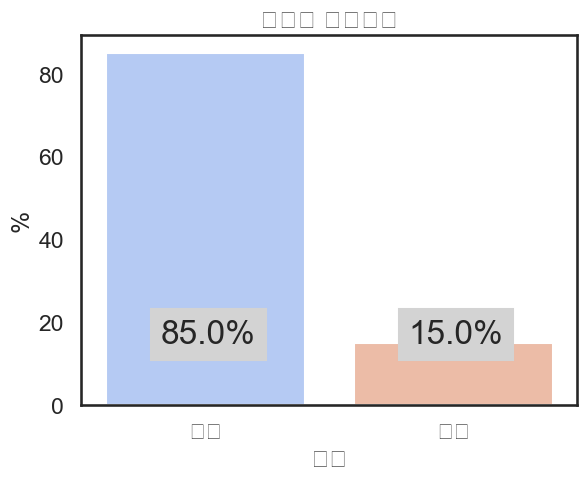

In [238]:

dicti=({'긍정': 긍정수,'부정': 부정수})
pd_df = pd.DataFrame(list(dicti.items()))
pd_df.columns =["반응", "%"]
sns.barplot(x='반응', y='%', data=pd_df, order=pd_df['반응'], palette='coolwarm')
plt.title('충주호 감성분포')
plt.text(-0.18, 15, str(긍정수)+"%", fontsize=24, bbox=dict(boxstyle='square', color='lightgray'))
plt.text(0.82, 15, str(부정수)+"%", fontsize=24, bbox=dict(boxstyle='square', color='lightgray'))
plt.show()